<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


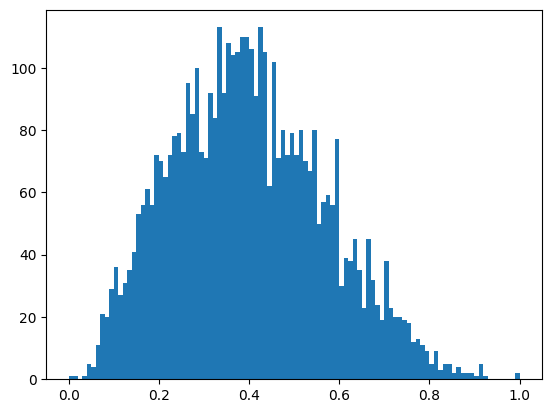

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df.target, 100)
_ = plt.plot()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340762242646

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

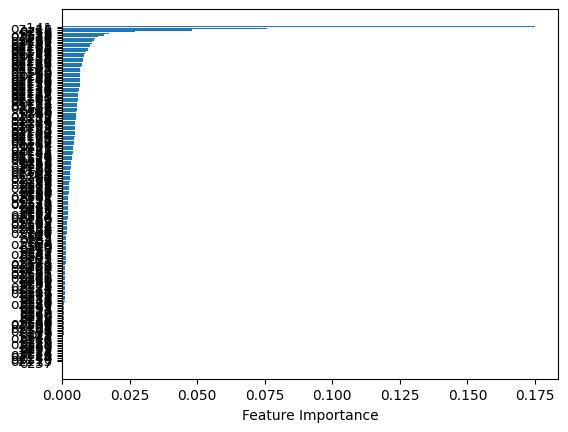

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
rf.feature_importances_[sort][-10:]

array([0.01109689, 0.01166214, 0.01230481, 0.01342846, 0.01529722,
       0.01722279, 0.02697703, 0.04820496, 0.07566195, 0.17487839])

In [ ]:
df.data.columns[sort][-10:]

Index(['oz197', 'oz35', 'oz198', 'oz20', 'oz112', 'oz137', 'oz18', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [ ]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz117,oz158,oz157,oz56,oz159,oz155,oz180,oz162,oz201,oz183,oz197,oz35,oz198,oz20,oz112,oz137,oz18,oz48,oz15,oz141
0,0.000000,0.800120,0.000000,0.126277,0.929724,0.752291,0.002655,0.319206,0.127564,0.037098,0.505899,0.0,0.039213,0.000000,0.000000,0.000000,0.0625,0.312855,0.000000,0.041308
1,0.311793,0.791224,0.000281,0.422015,0.944542,0.745984,0.002581,0.306084,0.475618,0.087622,0.683820,0.4,0.326584,0.242424,0.222222,0.278945,0.0625,0.297041,0.282828,0.212274
2,0.000000,0.798276,0.001852,0.000000,0.946121,0.753298,0.002722,0.406309,0.497968,0.056448,0.499219,0.0,0.204885,0.388889,0.000000,0.000000,0.1250,0.288557,0.388889,0.063643
3,0.000000,0.800965,0.000158,0.000000,0.945087,0.767469,0.002473,0.327848,0.134458,0.062874,0.630533,0.1,0.023469,0.095238,0.000000,0.039437,0.0000,0.310692,0.111111,0.031193
4,0.000000,0.802893,0.000037,0.000000,0.941644,0.741548,0.002810,0.329857,0.295913,0.035746,0.516053,0.0,0.111398,0.260870,0.000000,0.000000,0.0625,0.286581,0.304348,0.063643


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.3644225213009099

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 49)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.4274496190003364

In [ ]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

In [ ]:
from sklearn.linear_model import LogisticRegression
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [ ]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [ ]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [ ]:
y_train.value_counts()

,count
class,
R,216
L,215
B,37


In [ ]:
X_train["target"] = y_train

In [ ]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [ ]:
import pandas as pd
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


In [ ]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [ ]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [ ]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

<ipython-input-34-fe69465c1096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


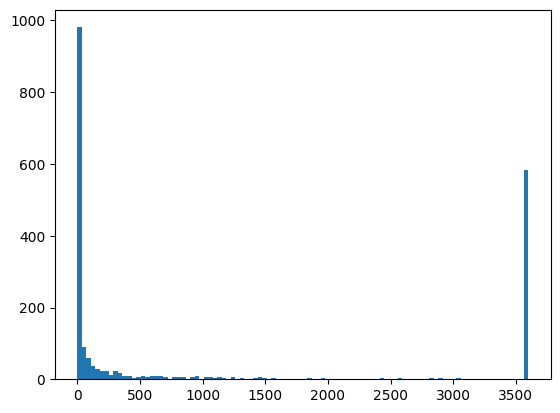

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

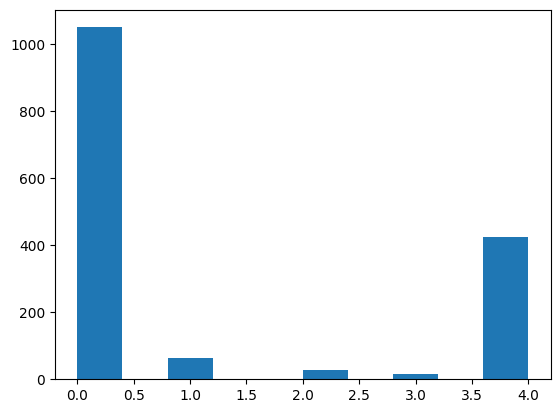

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))
plt.hist(y_binned, 10)
_ = plt.plot()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


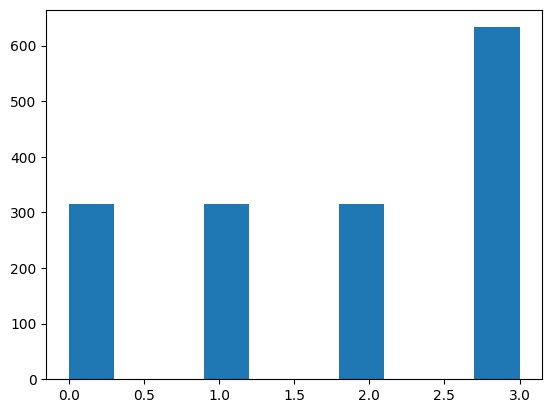

In [ ]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))
plt.hist(y_binned, 10)
_ = plt.plot()

**Самостоятельные задания**

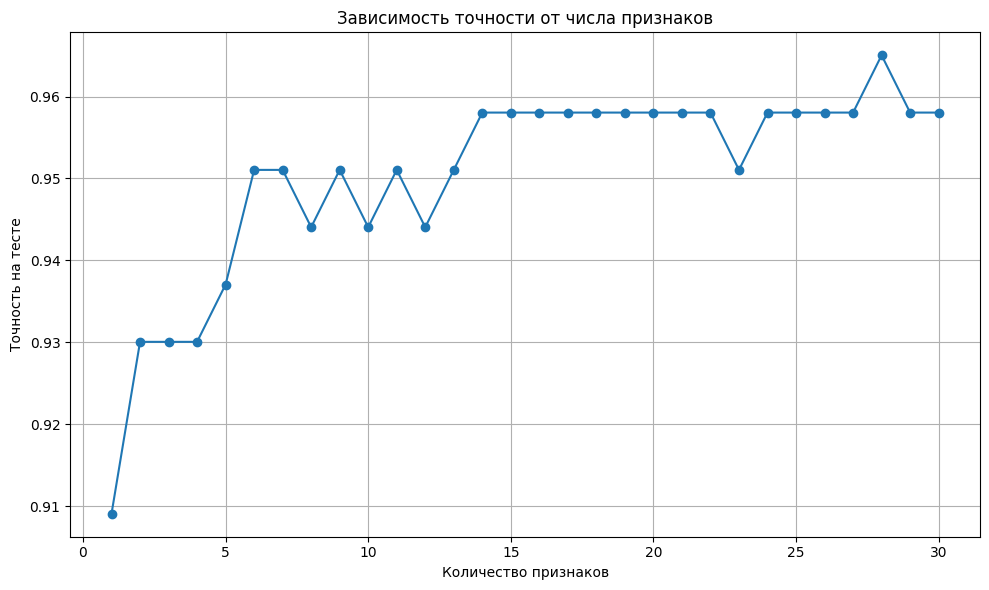

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Загружаем примерные данные (можно заменить на свои)
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Делим данные
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Базовая модель для получения важности признаков
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)
importances = base_model.feature_importances_

# Сортируем признаки по важности
indices_sorted = np.argsort(importances)[::-1]

# Проверим точность модели на разном числе топ-N признаков
num_features_list = range(1, len(importances) + 1)
accuracies = []

for n in num_features_list:
    selected_indices = indices_sorted[:n]
    X_train_sel = X_train[:, selected_indices]
    X_test_sel = X_test[:, selected_indices]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, accuracies, marker='o')
plt.xlabel('Количество признаков')
plt.ylabel('Точность на тесте')
plt.title('Зависимость точности от числа признаков')
plt.grid(True)
plt.tight_layout()
plt.show()

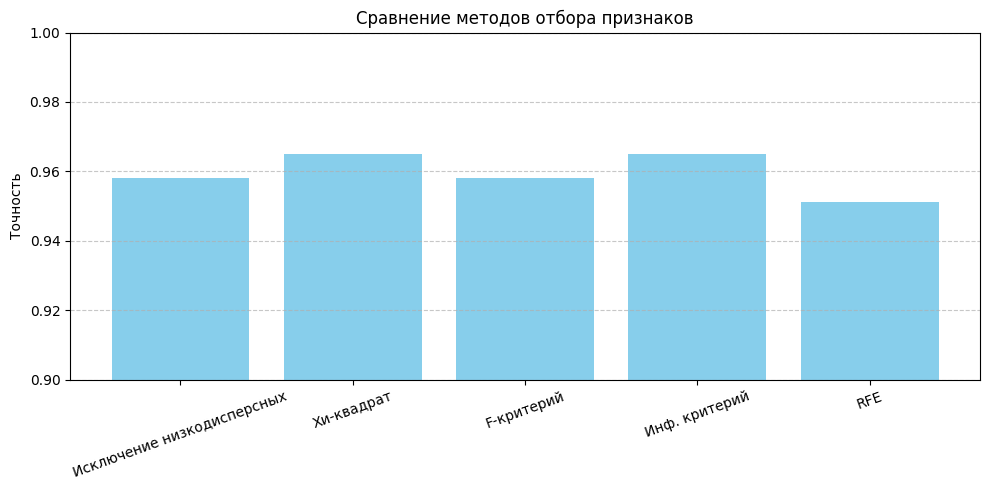

                        Метод  Точность
0  Исключение низкодисперсных  0.958042
1                  Хи-квадрат  0.965035
2                  F-критерий  0.958042
3               Инф. критерий  0.965035
4                         RFE  0.951049


In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif, RFE

# Загрузка данных
data = load_breast_cancer()
X, y = pd.DataFrame(data.data, columns=data.feature_names), data.target

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Функция для оценки точности модели
def evaluate_model(X_train, X_test, y_train, y_test, model=None):
    if model is None:
        model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Метод 1: Исключение низкодисперсных признаков
vt = VarianceThreshold(threshold=0.01)
X_train_vt = vt.fit_transform(X_train)
X_test_vt = vt.transform(X_test)
acc_vt = evaluate_model(X_train_vt, X_test_vt, y_train, y_test)

# Метод 2.1: Хи-квадрат
X_train_chi2 = SelectKBest(score_func=chi2, k=10).fit_transform(abs(X_train), y_train)
X_test_chi2 = SelectKBest(score_func=chi2, k=10).fit(abs(X_train), y_train).transform(abs(X_test))
acc_chi2 = evaluate_model(X_train_chi2, X_test_chi2, y_train, y_test)

# Метод 2.2: F-критерий (ANOVA)
X_train_f = SelectKBest(score_func=f_classif, k=10).fit_transform(X_train, y_train)
X_test_f = SelectKBest(score_func=f_classif, k=10).fit(X_train, y_train).transform(X_test)
acc_f = evaluate_model(X_train_f, X_test_f, y_train, y_test)

# Метод 2.3: Информационный критерий (mutual_info)
X_train_mi = SelectKBest(score_func=mutual_info_classif, k=10).fit_transform(X_train, y_train)
X_test_mi = SelectKBest(score_func=mutual_info_classif, k=10).fit(X_train, y_train).transform(X_test)
acc_mi = evaluate_model(X_train_mi, X_test_mi, y_train, y_test)

# Метод 3: Рекурсивное исключение признаков (RFE)
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
acc_rfe = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test)

# Сбор результатов
results = pd.DataFrame({
    "Метод": [
        "Исключение низкодисперсных",
        "Хи-квадрат",
        "F-критерий",
        "Инф. критерий",
        "RFE"
    ],
    "Точность": [
        acc_vt,
        acc_chi2,
        acc_f,
        acc_mi,
        acc_rfe
    ]
})

# Визуализация
plt.figure(figsize=(10, 5))
plt.bar(results["Метод"], results["Точность"], color='skyblue')
plt.ylim(0.9, 1.0)
plt.ylabel("Точность")
plt.title("Сравнение методов отбора признаков")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(results)


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Загрузка данных
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # <-- превращаем в Series, чтобы избежать ошибки индексации

# Искусственно создаем дисбаланс классов
X_minority = X[y == 1].sample(frac=0.2, random_state=42)
y_minority = y.loc[X_minority.index]

X_majority = X[y == 0]
y_majority = y.loc[X_majority.index]

X_imbalanced = pd.concat([X_majority, X_minority], axis=0)
y_imbalanced = pd.concat([y_majority, y_minority], axis=0)

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X_imbalanced, y_imbalanced, test_size=0.3, random_state=42, stratify=y_imbalanced)

# Без балансировки
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Без балансировки:")
print(classification_report(y_test, y_pred))

# С SMOTE (оверсемплинг)
smote_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=10000))
])
smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)
print("\nС SMOTE (оверсемплинг):")
print(classification_report(y_test, y_pred_smote))

# С RandomUnderSampler (андерсемплинг)
under_pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression(max_iter=10000))
])
under_pipeline.fit(X_train, y_train)
y_pred_under = under_pipeline.predict(X_test)
print("\nС RandomUnderSampler (андерсемплинг):")
print(classification_report(y_test, y_pred_under))

Без балансировки:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.87      0.95      0.91        21

    accuracy                           0.95        85
   macro avg       0.93      0.95      0.94        85
weighted avg       0.96      0.95      0.95        85


С SMOTE (оверсемплинг):
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.74      0.95      0.83        21

    accuracy                           0.91        85
   macro avg       0.86      0.92      0.88        85
weighted avg       0.92      0.91      0.91        85


С RandomUnderSampler (андерсемплинг):
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        64
           1       0.71      0.95      0.82        21

    accuracy                           0.89        85
   macro avg       0.85      0.91      0.87   

Baseline (регрессия) MSE: 0.2542

Стратегия: uniform, n_bins: 3
Точность классификации: 0.8339
Отчет:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      2522
           1       0.77      0.80      0.79      1906
           2       0.83      0.68      0.75       732

    accuracy                           0.83      5160
   macro avg       0.83      0.79      0.81      5160
weighted avg       0.83      0.83      0.83      5160


Стратегия: uniform, n_bins: 5
Точность классификации: 0.7281
Отчет:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      1122
           1       0.73      0.83      0.78      1968
           2       0.64      0.63      0.64      1142
           3       0.58      0.44      0.50       498
           4       0.79      0.66      0.72       430

    accuracy                           0.73      5160
   macro avg       0.72      0.67      0.69      5160
weighted avg

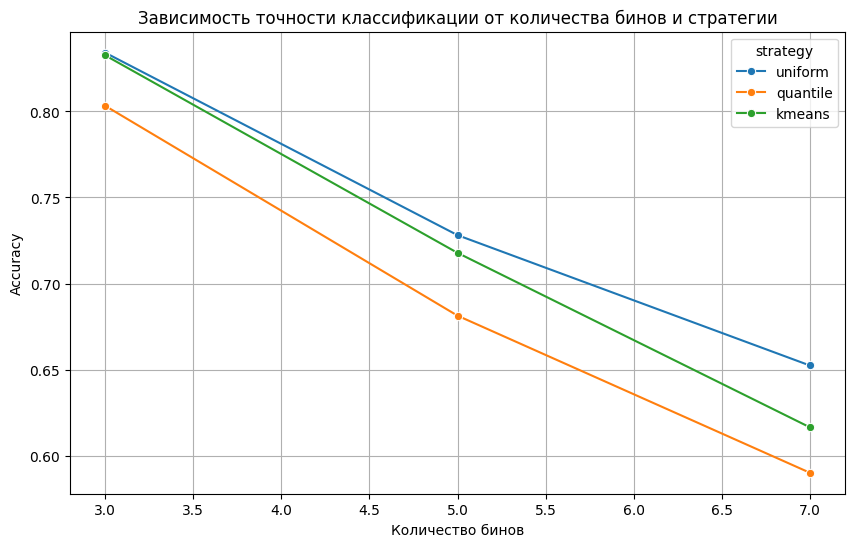

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

# ЗАГРУЗКА ДАННЫХ
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target  # целевая переменная - цена жилья

# === BASELINE ===
# Задача регрессии
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
baseline_preds = reg.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_preds)
print(f"Baseline (регрессия) MSE: {baseline_mse:.4f}")

# === BINNING ЦЕЛЕВОЙ ПЕРЕМЕННОЙ И КЛАССИФИКАЦИЯ ===
strategies = ['uniform', 'quantile', 'kmeans']
n_bins_list = [3, 5, 7]

results = []

for strategy in strategies:
    for n_bins in n_bins_list:
        # Биннинг
        kb = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        y_binned = kb.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

        # Сплит и обучение классификатора
        X_train, X_test, y_train_binned, y_test_binned = train_test_split(X, y_binned, random_state=42, stratify=y_binned)

        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train_binned)
        preds = clf.predict(X_test)

        acc = accuracy_score(y_test_binned, preds)
        results.append({
            'strategy': strategy,
            'n_bins': n_bins,
            'accuracy': acc
        })

        print(f"\nСтратегия: {strategy}, n_bins: {n_bins}")
        print("Точность классификации:", f"{acc:.4f}")
        print("Отчет:\n", classification_report(y_test_binned, preds))

# === ВИЗУАЛИЗАЦИЯ ===
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='n_bins', y='accuracy', hue='strategy', marker='o')
plt.title('Зависимость точности классификации от количества бинов и стратегии')
plt.xlabel('Количество бинов')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()